## 변수(variable)의 구분

- 질적변수 : 설문조사 만족도, 남성/여성, 흡연여부 등
- 양적변수 : 키, 몸무게, 온도, 시험 점수 등

### 척도에 따른 구분
- 질적변수 : 명목척도, 서열척도
- 양적변수 : 등간척도, 비율척도

- 명목척도 : 단순 분류를 위한 변수(학생번호, 성별 등)
- 서열척도 : 순서나 대소에 의미가 있음(성적순위, 설문만족도)  
    - 4위 vs 8위, 7위 vs 11위의 차이가 동일하다는 비교 불가(무의미)
    - 양적변수가 아니기 때문에 수치연산의 의미가 없음
- 등간척도 : 대소관계가 있고, 수치의 차이에도 의미가 있음(온도)  
    - 60$^{\circ}$C는 30$^{\circ}$C보다 30$^{\circ}$C 높다
    - 그러나 2배 높은 것은 아니다
- 비율척도 : 대소관계, 차이, 비율 모두 의미를 가짐  
    - 100cm는 50cm보다 2배 길다 

**등간 vs 비율 : "0의 의미"로 구분해보자**

- 0$^{\circ}$C는 "없음"이 아니다
- 0cm는 "없음"이다

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from sklearn import datasets
import seaborn as sns

In [7]:
np.random.seed(100) # 난수 생성
scores_arr = np.vstack([np.random.choice(range(30,81), 20, replace=True),  # replace=True : 복원추출
                       np.random.choice(range(20,91), 20, replace=True)])
scores_arr

array([[38, 54, 33, 69, 53, 45, 78, 40, 60, 64, 32, 64, 44, 64, 79, 78,
        54, 45, 66, 73],
       [80, 78, 36, 29, 22, 47, 24, 51, 21, 33, 24, 79, 87, 27, 69, 67,
        85, 81, 34, 75]])

In [5]:
scores_df = pd.DataFrame(scores_arr.T, columns= ['eng', 'math'])

In [6]:
name = [name for name in string.ascii_uppercase[:20]]

In [8]:
scores_df['name'] = name

In [9]:
scores_df = scores_df[['name', 'eng', 'math']]

In [10]:
scores_df

,name,eng,math
0,A,38,80
1,B,54,78
2,C,33,36
3,D,69,29
4,E,53,22
5,F,45,47
6,G,78,24
7,H,40,51
8,I,60,21
9,J,64,33


In [11]:
scores_df.describe()

,eng,math
count,20.000000,20.000000
mean,56.650000,52.450000
std,15.118044,25.060926
min,32.000000,21.000000
25%,44.750000,28.500000
50%,57.000000,49.000000
75%,66.750000,78.250000
max,79.000000,87.000000


우리반의 영어와 수학 시험 결과 분석(기술통계 : descriptive stats analysis)

응시자는 20명으로 동일하며, 평균 점수는 영어가 수학보다 4점 가량 높은 것으로 나타났다. 영어의 최소 - 최대값은 32 - 79점으로 수학의 최소 - 최대값인 21 - 87점보다 더 좁은 범위를 보이고 있다. 영어의 평균 점수와 중앙값은 거의 일치하는 것으로 보아 32-79점 사이에 비교적 고르게 분포하고 있을 것으로 판단된다. 반면 수학의 평균은 52.45로 중앙값 49보다 3.5점 가량 높게 나타났고 전체적인 분포에서 고득점자(들)가 존재할 것으로 보여진다.
표준편차를 살펴보아도 수학의 편차가 10점가량 커서 전체적인 산포가 영어보다 넓다.

In [13]:
scores_df.describe().iloc[1]

eng     56.65
math    52.45
Name: mean, dtype: float64

In [15]:
scores_df.describe().loc['mean']

eng     56.65
math    52.45
Name: mean, dtype: float64

In [16]:
scores_df['eng'].mean()

56.65

In [17]:
np.mean(scores_df['eng'])

56.65

In [19]:
scores_df.median()

eng     57.0
math    49.0
dtype: float64

In [20]:
np.median(scores_df['math'])

49.0

In [21]:
print(np.min(scores_df))
print(np.max(scores_df))

name     A
eng     32
math    21
dtype: object
name     T
eng     79
math    87
dtype: object


In [23]:
np.percentile(scores_df['eng'],25)

44.75

In [24]:
np.percentile(scores_df['math'],75)

78.25

In [25]:
scores_df.describe().loc['75%']

eng     66.75
math    78.25
Name: 75%, dtype: float64

In [27]:
scores_df.quantile(0.75)

eng     66.75
math    78.25
Name: 0.75, dtype: float64

[표준편차]
​
분산과 표준편차의 사용에는 주의가 필요하다.  
넘파이와 판다스에서 default로 반환하는 분산의 값이 서로 다르기 때문.
​
넘파이는 데이터 자체의 분산을 계산하는 반면,  
판다스는 `표본분산`(불편분산이라 칭함)을 계산한다.(표본표준편차)

In [28]:
scores_df.describe().loc['std'][0]

15.11804429011553

In [29]:
np.std(scores_df['eng'])

14.735246859146947

In [30]:
scores_df['eng'].std()

15.11804429011553

In [31]:
scores_df['eng'].std(ddof=0)

14.735246859146947

In [33]:
np.std(scores_df['eng'], ddof=1)

15.11804429011553

In [35]:
#[표준편차와 표본표준편차 직접 구해보기]

n = 20
variance_eng = np.array(scores_df['eng']) - np.mean(scores_df['eng'])

In [36]:
# 표준편차
np.sqrt(sum(variance_eng**2)/n)

14.735246859146947

In [37]:
# 표본 표준편차
np.sqrt(sum(variance_eng**2)/(n-1))

15.11804429011553

In [38]:
# 도수분포표

In [90]:
import matplotlib

In [92]:
import matplotlib.font_manager as fm

font_path = 'C:\\WINDOWS\\Fonts\\malgun.ttf'

font_name = fm.FontProperties(fname = font_path).get_name()

plt.rcParams['font.family'] = font_name

In [39]:
np.linspace(0, 100, 10+1)

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

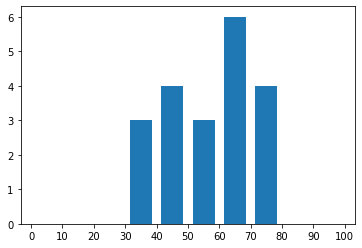

In [63]:
plt.hist(scores_df['eng'], bins=10, range=(0, 100), rwidth=0.7)
plt.xticks(np.linspace(0, 100, 10+1))  # 간격 설정 
plt.show()

누적상대도수 함께 표현하기

In [64]:
np.histogram(scores_df['eng'], bins=10, range=(0, 100))

(array([0, 0, 0, 3, 4, 3, 6, 4, 0, 0], dtype=int64),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]))

In [66]:
rel_freq, _ = np.histogram(scores_df['eng'], bins = 10, range = (0, 100))

In [68]:
np.cumsum(rel_freq) / sum(rel_freq)

array([0.  , 0.  , 0.  , 0.15, 0.35, 0.5 , 0.8 , 1.  , 1.  , 1.  ])

In [82]:
cum_rel_freq = np.cumsum(rel_freq) / sum(rel_freq)

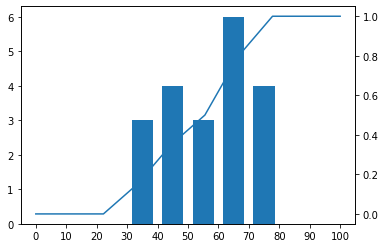

In [84]:
plt.hist(scores_df['eng'], bins = 10, range = (0,100), rwidth = 0.7)
plt.twinx()
plt.plot(np.linspace(0,100,10), cum_rel_freq)
plt.xticks(np.linspace(0,100,10+1))
plt.show()

In [93]:
import matplotlib.font_manager as fm

font_name = fm.FontProperties(fname = font_path).get_name()
plt.rcParams['font.family'] = font_name

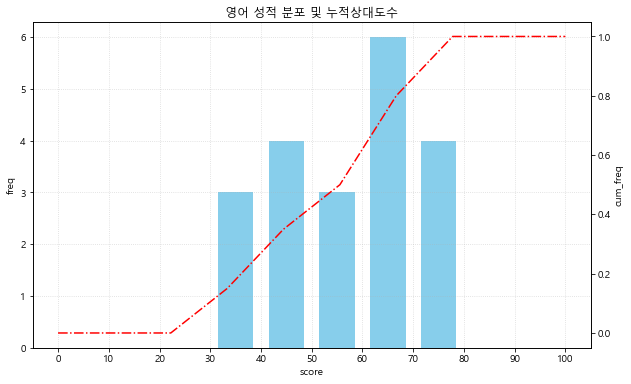

In [94]:
fig = plt.figure(figsize = (10, 6))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()

ax1.hist(scores_df['eng'], bins = 10, range = (0,100), rwidth = 0.7, color = 'skyblue')
ax2.plot(np.linspace(0,100,10), cum_rel_freq, color='red', ls='-.')

ax1.set_xticks(np.linspace(0,100,10+1))
ax1.set_xlabel('score')
ax1.set_ylabel('freq')
ax2.set_ylabel('cum_freq')
ax1.grid(ls = ':', alpha = 0.5)
ax1.set_title('영어 성적 분포 및 누적상대도수')
import matplotlib.font_manager as fm

font_path = 'C:\\WINDOWS\\Fonts\\gulim.ttc'

font_name = fm.FontProperties(fname = font_path).get_name()

plt.rcParams['font.family'] = font_name
plt.show()

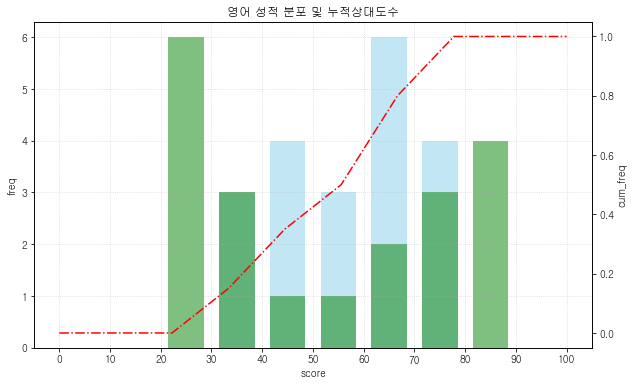

In [125]:
fig = plt.figure(figsize = (10, 6))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()

ax1.hist(scores_df['eng'], bins = 10, range = (0,100), rwidth = 0.7, color = 'skyblue',
        alpha = 0.5)
ax1.hist(scores_df['math'], bins = 10, range = (0,100), rwidth = 0.7, color = 'g',
        alpha = 0.5)
ax2.plot(np.linspace(0,100,10), cum_rel_freq, color='red', ls='-.')

ax1.set_xticks(np.linspace(0,100,10+1))
ax1.set_xlabel('score')
ax1.set_ylabel('freq')
ax2.set_ylabel('cum_freq')
ax1.grid(ls = ':', alpha = 0.5)
ax1.set_title('영어 성적 분포 및 누적상대도수')

plt.show()

#### [Quiz] 영어와 수학의 성적분포 히스토그램과 누적상대도수 그래프를 그려보세요

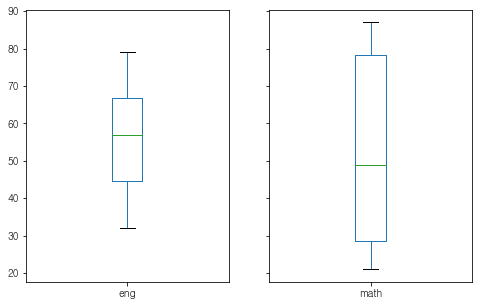

In [97]:

fig, ax=plt.subplots(1, 2, figsize=(8,5), sharey=True)

scores_df['eng'].plot.box(ax=ax[0])
scores_df['math'].plot.box(ax=ax[1])

plt.show()

In [104]:
iris = datasets.load_iris()

In [107]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
# feature_names : sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)

- iris 데이터에서 각 변수에 따라 boxplot 생성

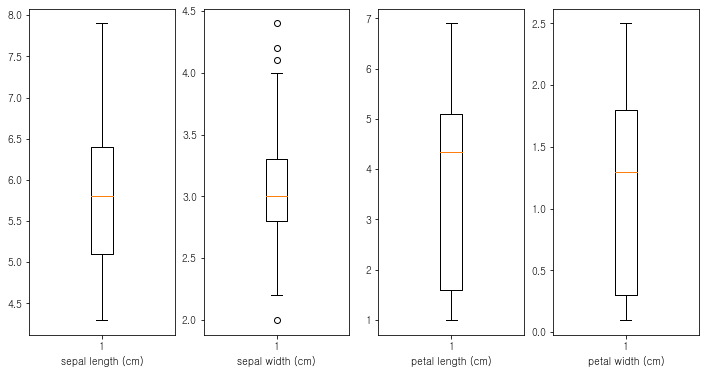

In [128]:
fig, axes = plt.subplots(1, 4, figsize = (12, 6))
for i in range(4):
    axes[i].boxplot(iris['data'][:,i])
    axes[i].set_xlabel(iris['feature_names'][i])

In [111]:
scores_df.head(2)

,name,eng,math
0,A,38,80
1,B,54,78


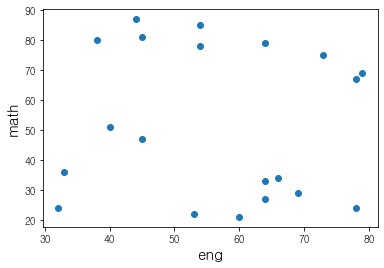

In [112]:
plt.scatter(scores_df['eng'], scores_df['math'])
plt.xlabel('eng', fontsize=15)
plt.ylabel('math', fontsize=15)

plt.show()

In [113]:
scores_df[['eng', 'math']].corr()

,eng,math
eng,1.000000,-0.056796
math,-0.056796,1.000000


In [114]:
scores_df[['eng', 'math']].corr(method = 'pearson')

,eng,math
eng,1.000000,-0.056796
math,-0.056796,1.000000


- 연속형-연속형(일반 수치형 or 비율 척도)의 상관계수 -> pearson
- spearman : 서열척도 간의 상관관계

In [116]:
# 히트맵

# import seaborn as sns
# ?sns.heatmap

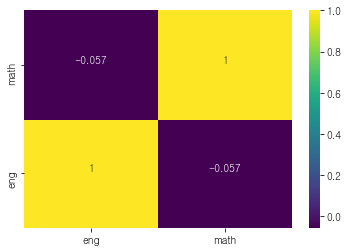

In [120]:
sns.heatmap(scores_df[['eng','math']].corr(), cmap='viridis',
           annot = True, annot_kws = {"ha":"center", "va":"bottom"})
plt.gca().invert_yaxis()  # y축 두 변수의 위치를 바꿀 때
plt.show()

In [ ]:
# 히트맵
# matplotlib의 hist2d의 히트맵 시각화

# 도수분포표를 이러한 형태로 시각화 한 것인데, 2차원일뿐
# 각각 교차되는 도수를 표현

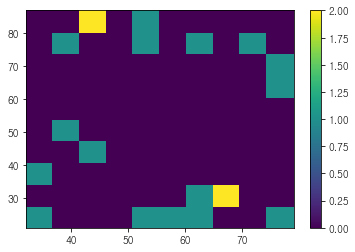

In [121]:
plt.hist2d(scores_df['eng'], scores_df['math'])
plt.colorbar()

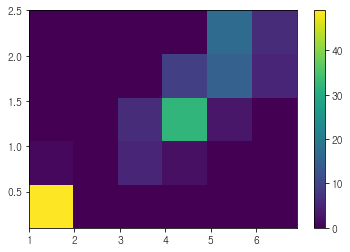

In [122]:
plt.hist2d(iris['data'][:,2], iris['data'][:,3], bins = [6,5])
plt.colorbar()

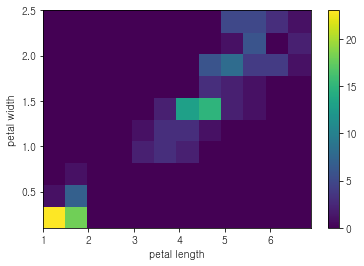

In [123]:
plt.hist2d(iris['data'][:,2], iris['data'][:,3], bins=[12, 10])  # bins : 막대를 몇개 표현할 것인가
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.colorbar()

plt.show()

NameError: name 'bb' is not defined

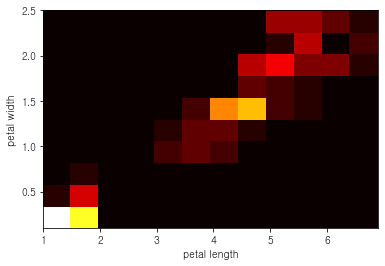

In [124]:
plt.hist2d(iris['data'][:,2], iris['data'][:,3], bins = [12, 10], cmap='hot')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.xticks(np.linspace(iris['data'][:2].min(),iris['data'][:,2].max(), 12+bb),
          rotation = 90)
plt.colorbar()

plt.show()